In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2') 

In [3]:
file_path = 'test_news_3.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    document = file.read()

sentences = document.split('\n')

politics = sentences[:10] (10문장)

food = sentences[10:24] (14문장)

sports = sentences[24:36] (12문장)

food = sentences[36:48] (12문장)

business = sentences[48:62] (10문장)

politics = sentences[62:] (10문장)

In [4]:
print(len(sentences))
print(len(sentences[:10]))
print(len(sentences[10:24]))
print(len(sentences[24:36]))
print(len(sentences[36:47]))
print(len(sentences[47:61]))
print(len(sentences[61:]))

72
10
14
12
11
14
11


In [5]:
# 비교 문장 (윈도우 크기 2)
window_2_list = [' '.join(sentences[i:i+2]) for i in range(len(sentences)-1)]

# 비교 문장 윈도우 3
window_3_list = [' '.join(sentences[i:i+3]) for i in range(len(sentences)-2)]

In [6]:
print(len(window_2_list))
print(len(window_3_list))

71
70


In [7]:
# 임베딩
ebd_a = model.encode(sentences)
ebd_b_2 = model.encode(window_2_list)
ebd_b_3 = model.encode(window_3_list)

In [8]:
# 1) ebd_a의 i+2번째와 ebd_b_2의 i번째 비교(len(ebd_a)-2)
similarities_2 = []
for i in range(len(ebd_a)-2):
    similarity_i_2 = cosine_similarity([ebd_b_2[i]], [ebd_a[i + 2]])[0][0]
    similarities_2.append(similarity_i_2)
    
# 2) ebd_a의 i+3번째와 ebd_b_2의 i번째 비교(len(ebd_a)-3)
similarities_3 = []
for i in range(len(ebd_a)-3):
    similarity_i_3 = cosine_similarity([ebd_b_3[i]], [ebd_a[i + 3]])[0][0]
    similarities_3.append(similarity_i_3)

In [9]:
print(len(similarities_2))
print(len(similarities_3))

70
69


c:\Users\user\anaconda3\envs\PY39_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50952 (\N{HANGUL SYLLABLE WIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\PY39_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\PY39_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\PY39_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\PY39_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_fi

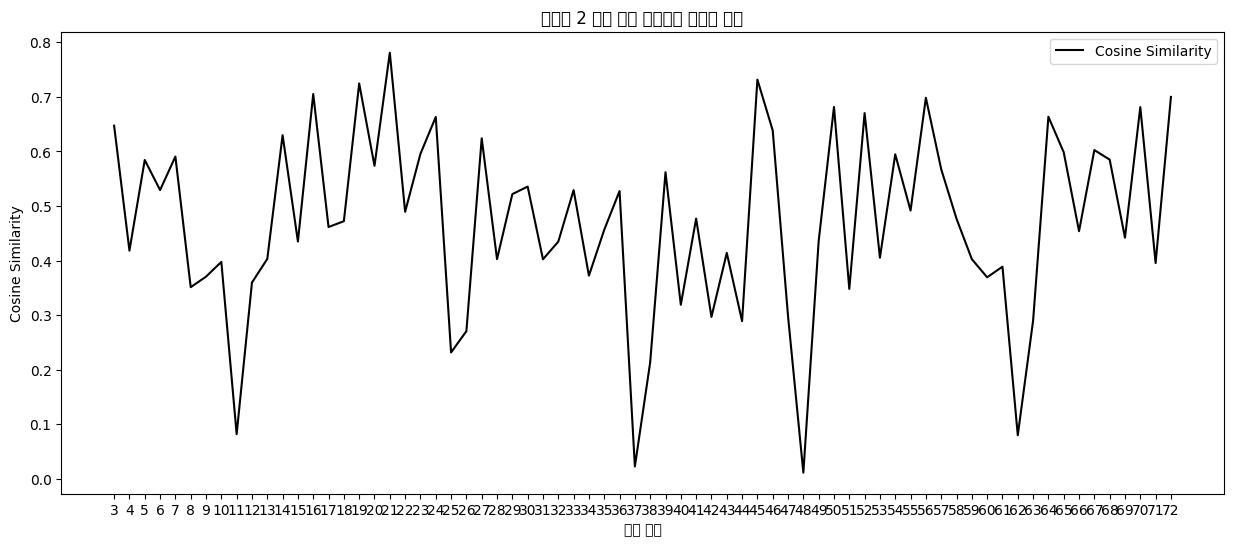

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(range(3, 73), similarities_2, linestyle='-', color='black', label='Cosine Similarity')
plt.xlabel('문장 번호')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.xticks(range(3, 73))
plt.title('윈도우 2 크기 이전 문장과의 유사도 비교')
plt.rc('font', family='MalgunGothic')
plt.show()

In [11]:
# plt.figure(figsize=(15, 6))
# plt.plot(range(1, 34), similarities_3, linestyle='-', color='black', label='Cosine Similarity')
# plt.xlabel('N')
# plt.ylabel('Cosine Similarity')
# plt.legend()
# plt.xticks(range(1, 34))
# plt.title('(N,N+1,N+2)문장들과 N+3번째 문장의 코사인 유사도 비교')
# plt.rc('font', family='MalgunGothic')
# plt.show()

# 클러스터링

전체 임베딩 평균

In [12]:
doc_1 = ebd_a[:10]
doc_2 = ebd_a[10:24]
doc_3 = ebd_a[24:36]
doc_4 = ebd_a[36:47]
doc_5 = ebd_a[47:61]
doc_6 = ebd_a[61:]

In [13]:
doc_list_avr = [doc_1, doc_2, doc_3, doc_4, doc_5, doc_6]

doc_avr = []
for i in doc_list_avr:
    avr = np.mean(i.astype(np.float32), axis=0)
    doc_avr.append(avr)

In [27]:
umap_model = UMAP(n_components=2)
reduced_data_avr = umap_model.fit_transform(doc_avr)
reduced_data_all = umap_model.fit_transform(ebd_a)

c:\Users\user\anaconda3\envs\PY39_\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [28]:
linkage_matrix_avr = linkage(reduced_data_avr, method='ward')
linkage_matrix_all = linkage(reduced_data_all, method='ward')

In [29]:
# 클러스터 라벨 얻기
threshold = 1  #2
labels_avr = fcluster(linkage_matrix_avr, t=threshold, criterion='distance')
labels_all = fcluster(linkage_matrix_all, t=threshold, criterion='distance')

In [30]:
labels_avr

array([1, 3, 4, 3, 2, 1], dtype=int32)

In [69]:
clustered_data = {}
for i, label in enumerate(labels_avr):
    if label not in clustered_data:
        clustered_data[label] = []
    clustered_data[label].append(reduced_data_avr[i])

findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

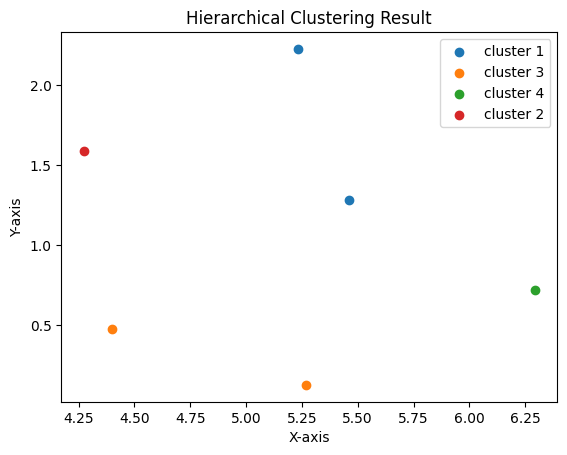

In [70]:
clustered_data = {}
for i, label in enumerate(labels_avr):
    if label not in clustered_data:
        clustered_data[label] = []
    clustered_data[label].append(reduced_data_avr[i])

# Scatter plot 그리기
for label, data_points in clustered_data.items():
    data_points = np.array(data_points)
    plt.scatter(data_points[:, 0], data_points[:, 1], label=f'cluster {label}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Hierarchical Clustering Result')
plt.legend()
plt.show()

In [71]:
color_threshold = 1.5
cluster_colors = [f'C{i}' for i in labels_avr]

In [72]:
list(labels_avr)

[1, 3, 4, 3, 2, 1]

In [73]:
linkage_matrix_avr

array([[1.        , 3.        , 0.93491549, 2.        ],
       [0.        , 5.        , 0.97425809, 2.        ],
       [4.        , 7.        , 1.25469807, 3.        ],
       [2.        , 6.        , 1.75267524, 3.        ],
       [8.        , 9.        , 2.25146905, 6.        ]])

In [74]:
distance_threshold = 1.5
cluster_colors = [f'C{i}' for i in range(6)]
def link_color_func(x):
    if x[2] >= distance_threshold:
        return 'grey'  # 기본 색상
    else:
        return 'red'

In [75]:
array([[1.        , 3.        , 0.93491549, 2.        ],
       [0.        , 5.        , 0.97425809, 2.        ],
       [4.        , 7.        , 1.25469807, 3.        ],
       [2.        , 6.        , 1.75267524, 3.        ],
       [8.        , 9.        , 2.25146905, 6.        ]])

NameError: name 'array' is not defined

findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.


findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

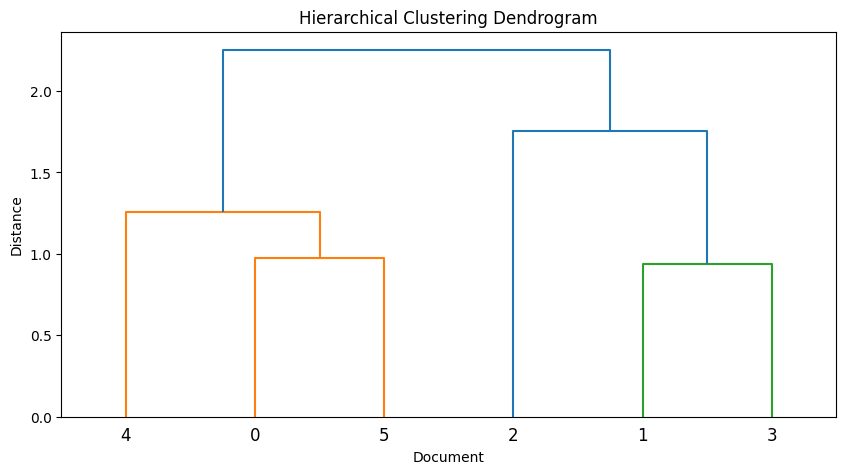

In [76]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix_avr)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Document')
plt.ylabel('Distance')
plt.show()

findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

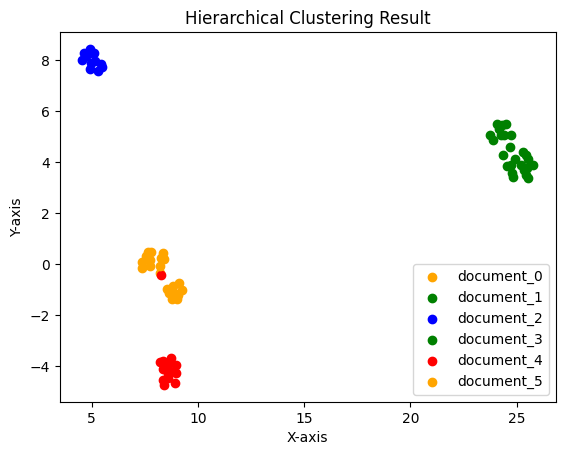

In [77]:
cl_1 = reduced_data_all[:10]
cl_2 = reduced_data_all[10:24]
cl_3 = reduced_data_all[24:36]
cl_4 = reduced_data_all[36:47]
cl_5 = reduced_data_all[47:61]
cl_6 = reduced_data_all[61:]

# # Scatter plot for each group with different colors
plt.scatter(cl_1[:, 0], cl_1[:, 1], label='document_0', color='orange')
plt.scatter(cl_2[:, 0], cl_2[:, 1], label='document_1', color='green')
plt.scatter(cl_3[:, 0], cl_3[:, 1], label='document_2', color='blue')
plt.scatter(cl_4[:, 0], cl_4[:, 1], label='document_3', color='green')
plt.scatter(cl_5[:, 0], cl_5[:, 1], label='document_4', color='red')
plt.scatter(cl_6[:, 0], cl_6[:, 1], label='document_5', color='orange')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Hierarchical Clustering Result')
plt.legend()
plt.show()